In [49]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [50]:
df2 = pd.read_csv('data/data.csv')

In [51]:

# Read in the data
df = pd.read_csv('data/data2.csv')
df['Preco'] = df['Preco']/100
df.drop_duplicates(inplace=True)
# show the first 5 rows
df.head()

,Tipo,Bairro,Cidade,Vagas,Quartos,Area,Banheiros,Preco
0,Casa,São João,Curitiba,10,4,1340,10,13000000.0
1,Casa,Cacupé,Florianópolis,5,5,580,5,13000000.0
2,Casa,Alphaville Graciosa,Pinhais,6,4,585,1,7950000.0
3,Casa,Santa Felicidade,Curitiba,14,4,622,7,7800000.0
4,Apartamento,Ecoville,Curitiba,0,4,380,0,7211303.0


In [52]:
# generate descriptive statistics of price column
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4223 entries, 0 to 4313
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tipo       4223 non-null   object 
 1   Bairro     4223 non-null   object 
 2   Cidade     4223 non-null   object 
 3   Vagas      4223 non-null   int64  
 4   Quartos    4223 non-null   int64  
 5   Area       4223 non-null   int64  
 6   Banheiros  4223 non-null   int64  
 7   Preco      4223 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 296.9+ KB


In [53]:
# Show the tree columns with the highest correlation with price
correlation_matrix = df.corr()


# Sort the correlations with "Preco" in descending order and exclude the "Preco" itself
top_correlations = correlation_matrix['Preco'].sort_values(ascending=False)[1:]

# Get the top three correlated columns
top_3_correlated = top_correlations.head(3)

print(top_3_correlated)



Banheiros    0.415436
Quartos      0.373181
Vagas        0.368314
Name: Preco, dtype: float64


C:\Users\Pablo\AppData\Local\Temp\ipykernel_20060\1854479924.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


C:\Users\Pablo\AppData\Local\Temp\ipykernel_20060\2625340915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Preco'])


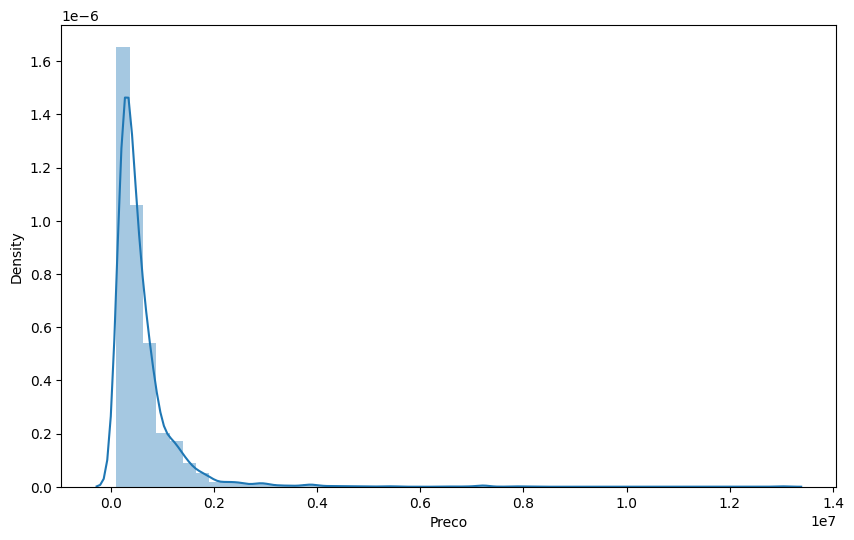

In [54]:
# Show the histogram of the prices
plt.figure(figsize=(10,6))
plt.tight_layout()
sns.distplot(df['Preco'])


plt.show()


In [55]:
df.describe()

,Vagas,Quartos,Area,Banheiros,Preco
count,4223.000000,4223.000000,4223.000000,4223.000000,4.223000e+03
mean,1.711343,2.760360,138.475965,1.865498,6.036201e+05
std,1.540479,0.946394,409.255903,1.160865,6.772485e+05
min,0.000000,0.000000,0.000000,0.000000,1.090000e+05
25%,1.000000,2.000000,65.000000,1.000000,2.670000e+05
50%,1.000000,3.000000,104.000000,2.000000,4.190000e+05
75%,2.000000,3.000000,160.000000,2.500000,6.980000e+05
max,24.000000,10.000000,24000.000000,10.000000,1.300000e+07


C:\Users\Pablo\AppData\Local\Temp\ipykernel_20060\125643205.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Tipo').mean()


<AxesSubplot: xlabel='Tipo', ylabel='Preco'>

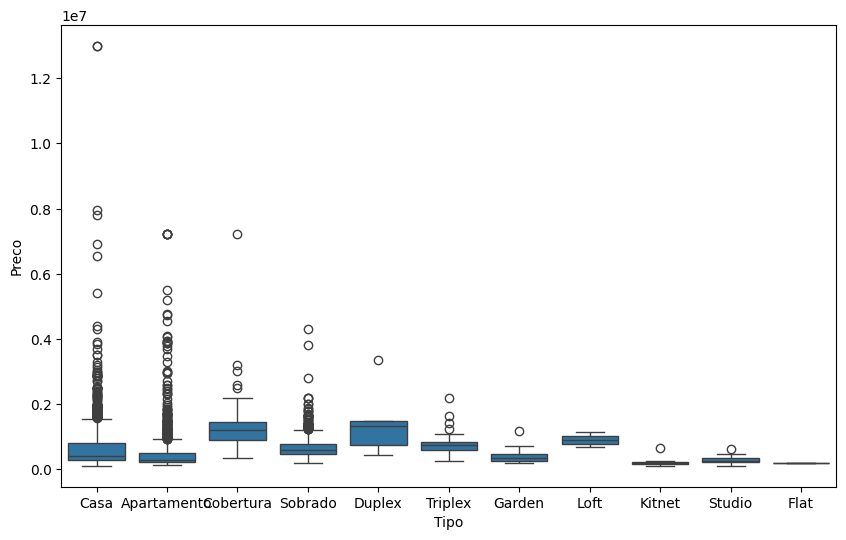

In [56]:
df['Tipo'].unique()
df.groupby('Tipo').mean()

# Show the boxplot of the prices by type
plt.figure(figsize=(10,6))
plt.tight_layout()
sns.boxplot(x='Tipo',y='Preco',data=df)



In [57]:
df.groupby('Cidade').count().reindex(['Preco'], axis=1).rename(columns={'Preco': 'Total'}).sort_values(by='Total', ascending=False).head(10)

,Total
Cidade,
Curitiba,2262
Pato Branco,290
Colombo,281
São José Dos Pinhais,209
Ponta Grossa,165
Pinhais,141
Campo Largo,116
Itapoá,116
Matinhos,115


In [58]:

df[df['Cidade'] == 'Curitiba'].groupby('Bairro').count().reindex(['Preco'], axis=1).rename(columns={'Preco': 'Total'}).sort_values(by='Total', ascending=False).head(10)

,Total
Bairro,
Centro,113
Água Verde,108
Santa Cândida,105
Cidade Industrial,95
Uberaba,93
Boqueirão,77
Portão,76
Boa Vista,71
Bairro Alto,67


In [59]:
from sklearn.preprocessing import OrdinalEncoder
data_encoded = OrdinalEncoder().fit_transform(df[['Tipo', 'Cidade', 'Bairro']])

data_encoded

df['Tipo'] = data_encoded[:,0]
df['Cidade'] = data_encoded[:,1]
df['Bairro'] = data_encoded[:,2]


In [60]:
# split the data in train and test
cwb = df[df['Cidade'] == 'Curitiba']

X = df[['Area', 'Quartos', 'Banheiros', 'Vagas', 'Tipo', 'Cidade']]
y = df['Preco']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
cwb

,Tipo,Bairro,Cidade,Vagas,Quartos,Area,Banheiros,Preco


In [62]:
# Show the first 5 rows of the train data
X_train.head()

,Area,Quartos,Banheiros,Vagas,Tipo,Cidade
187,310,4,5,2,8.0,38.0
443,134,2,2,2,0.0,18.0
2474,132,3,1,2,1.0,34.0
3637,79,2,1,1,0.0,38.0
3193,74,3,1,1,1.0,16.0


In [63]:
# Show the first 5 rows of the test data
X_test.head()

,Area,Quartos,Banheiros,Vagas,Tipo,Cidade
3996,47,2,1,1,0.0,16.0
2394,88,3,1,1,1.0,34.0
2507,94,2,1,1,0.0,18.0
4218,33,2,1,1,0.0,18.0
1731,86,3,2,1,0.0,18.0


In [64]:
# Show the correlation matrix of df
df.corr()

,Tipo,Bairro,Cidade,Vagas,Quartos,Area,Banheiros,Preco
Tipo,1.000000,0.008518,-0.050668,0.151015,0.226196,0.025705,0.357981,0.071318
Bairro,0.008518,1.000000,-0.108954,0.023019,0.026282,-0.007315,-0.012873,-0.006275
Cidade,-0.050668,-0.108954,1.000000,0.024747,-0.012841,-0.005500,-0.004409,0.040376
Vagas,0.151015,0.023019,0.024747,1.000000,0.429207,0.104588,0.415361,0.368314
Quartos,0.226196,0.026282,-0.012841,0.429207,1.000000,0.127993,0.509413,0.373181
Area,0.025705,-0.007315,-0.005500,0.104588,0.127993,1.000000,0.128269,0.152751
Banheiros,0.357981,-0.012873,-0.004409,0.415361,0.509413,0.128269,1.000000,0.415436
Preco,0.071318,-0.006275,0.040376,0.368314,0.373181,0.152751,0.415436,1.000000


In [65]:
# Use ML Algorithm to predict the price
# Create dummy variables for categorical columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [66]:
# Create a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500)

# Train the model
rf.fit(X_train, y_train)

# Predict the test data
predictions = rf.predict(X_test)
rf.score(X_test, y_test)


0.4792495574975857

In [67]:
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}).head(10).round(2)

,Actual,Predicted
3996,180000.00,159075.33
2394,380000.00,371863.08
2507,360000.00,364418.58
4218,150000.00,395070.01
1731,500000.00,398743.77
2383,380000.00,765709.52
2420,372105.32,327007.78
371,1250000.00,883908.65
233,1500000.00,689492.70
514,1100000.00,782755.81


In [68]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test.values, predictions)
y_test.values-predictions

array([ 20924.66732601,   8136.922     ,  -4418.58185524, ...,
       -45638.78366571, 143999.34394   , -62800.43333333])

In [69]:
# Create a Linear Regression
lm = LinearRegression()

# Train the model
lm.fit(X_train, y_train)

# Predict the test data
predictions = lm.predict(X_test)
lm.score(X_test, y_test)


-16.904992771211703

In [70]:
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}).head(10).round(2)

,Actual,Predicted
3996,180000.00,211013.18
2394,380000.00,398108.59
2507,360000.00,412271.17
4218,150000.00,153910.11
1731,500000.00,422116.94
2383,380000.00,836227.13
2420,372105.32,378989.35
371,1250000.00,673303.97
233,1500000.00,810771.42
514,1100000.00,914912.57


In [71]:
# Create a Knn Regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict the test data
predictions = knn.predict(X_test)
knn.score(X_test, y_test)



0.43535365409002635

In [72]:
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}).head(10).round(2)

,Actual,Predicted
3996,180000.00,195380.00
2394,380000.00,376764.92
2507,360000.00,763720.80
4218,150000.00,262917.20
1731,500000.00,373000.00
2383,380000.00,1029000.00
2420,372105.32,389800.00
371,1250000.00,930700.00
233,1500000.00,713170.40
514,1100000.00,1056000.00


In [73]:
# Create a Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

# Train the model
dt.fit(X_train, y_train)

# Predict the test data
predictions = dt.predict(X_test)
dt.score(X_test, y_test)


-0.2561368849201835

In [74]:

pd.DataFrame({'Actual': y_test, 'Predicted': predictions}).head(10).round(2)

,Actual,Predicted
3996,180000.00,150000.00
2394,380000.00,540000.00
2507,360000.00,280000.00
4218,150000.00,325000.00
1731,500000.00,415000.00
2383,380000.00,460000.00
2420,372105.32,310000.00
371,1250000.00,825900.11
233,1500000.00,750000.00
514,1100000.00,298000.00


In [76]:
# Create a Support Vector Regressor
from sklearn.svm import SVR
svr = SVR()

# Train the model
svr.fit(X_train, y_train)

# Predict the test data
predictions = svr.predict(X_test)
svr.score(X_test, y_test)


-0.09134829915375375

In [77]:

pd.DataFrame({'Actual': y_test, 'Predicted': predictions}).head(10).round(2)

,Actual,Predicted
3996,180000.00,409152.87
2394,380000.00,409353.12
2507,360000.00,409390.26
4218,150000.00,409119.32
1731,500000.00,409338.14
2383,380000.00,410012.50
2420,372105.32,409315.76
371,1250000.00,409930.60
233,1500000.00,409950.39
514,1100000.00,410010.46


In [78]:
# Create a Neural Network Regressor
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,100,100), max_iter=500)

# Train the model
mlp.fit(X_train, y_train)

# Predict the test data
predictions = mlp.predict(X_test)
mlp.score(X_test, y_test)


-19.299111636871476

In [79]:

pd.DataFrame({'Actual': y_test, 'Predicted': predictions}).head(10).round(2)

,Actual,Predicted
3996,180000.00,221713.92
2394,380000.00,386703.76
2507,360000.00,438212.19
4218,150000.00,170023.17
1731,500000.00,409622.06
2383,380000.00,840674.84
2420,372105.32,371920.37
371,1250000.00,688678.23
233,1500000.00,801125.21
514,1100000.00,834667.57
